In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error,classification_report

#train_df = pd.read_csv('data/train.csv')
train_df = pd.read_csv('train.csv')

train_df.info()

train_df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713605 entries, 0 to 713604
Columns: 1584 entries, OBJECTID to FIPS_NAME_Zavala
dtypes: float64(8), int64(1561), object(15)
memory usage: 8.4+ GB


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIPS_NAME_Yellowstone,FIPS_NAME_Yoakum,FIPS_NAME_Yolo,FIPS_NAME_York,FIPS_NAME_Young,FIPS_NAME_Yuba,FIPS_NAME_Yukon-Koyukuk,FIPS_NAME_Yuma,FIPS_NAME_Zapata,FIPS_NAME_Zavala
681417,1464070,201103450,W-622946,FED,DOI-WFMI,BIA,USCAHIA,Hoopa Valley Tribe,CAHIA,Hoopa Valley Tribe,...,0,0,0,0,0,0,0,0,0,0
567908,1379698,19075378,SFO-GA-LOW-181-3/16/1996-100,NONFED,ST-GAGAS,ST/C&L,USGAGAS,Georgia Forestry Commission,GAGAS,Georgia Forestry Commission,...,0,0,0,0,0,0,0,0,0,0
201103,1153010,1403921,ALS-BWT-20080208-002,NONFED,ST-ALALS,ST/C&L,USALALS,Alabama Forestry Commission,ALBWT,AFC Brewton,...,0,0,0,0,0,0,0,0,0,0
536163,691085,768782,MSARCH_4142,NONFED,ST-MSMSS,ST/C&L,USMSMSS,Mississippi Forestry Commission,MSMSS,Mississippi Forestry Commission,...,0,0,0,0,0,0,0,0,0,0
657059,1247447,1650604,SFO-GA-FY2001-McIntosh-022,NONFED,ST-NASF,ST/C&L,USGAGAS,Georgia Forestry Commission,GAGAS,Georgia Forestry Commission,...,0,0,0,0,0,0,0,0,0,0
169397,116345,117528,FS-342566,FED,FS-FIRESTAT,FS,USNVHTF,Humboldt-Toiyabe National Forest,0417,Humboldt-Toiyabe National Forest,...,0,0,0,0,0,0,0,0,0,0
427899,1605563,201626550,SFO-AR-2012-AR3/6/20123473,NONFED,ST-NASF,ST/C&L,USARARS,Arkansas Forestry Commission,AFC,Arkansas Forestry Commission,...,0,0,0,0,0,0,0,0,0,0
15627,794060,900247,SCHMIDT_55014444,NONFED,ST-WIWIS,ST/C&L,USWIWIS,Wisconsin Department of Natural Resources,WIWIS,Wisconsin Department of Natural Resources,...,0,0,0,0,0,0,0,0,0,0
270034,195949,198581,W-371426,FED,DOI-WFMI,BIA,USMTRBA,Rocky Boy's Agency,MTRBA,Rocky Boy's Agency,...,0,0,0,0,0,0,0,0,0,0
408145,1395119,19091011,SFO-GA-HAL-56-4/17/1996-1355,NONFED,ST-GAGAS,ST/C&L,USGAGAS,Georgia Forestry Commission,GAGAS,Georgia Forestry Commission,...,0,0,0,0,0,0,0,0,0,0


In [2]:
"""### Scaling Fire size"""

scaler = MinMaxScaler()
#train_df['FIRE_SIZE_SCALED'] = scaler.fit_transform(train_df[['FIRE_SIZE']])



In [3]:
"""### Selecting Important Columns"""

#good_cols = ["FIRE_YEAR","DISCOVERY_DOY","DISCOVERY_TIME","CONT_DOY","CONT_TIME","STAT_CAUSE_CODE",
#             "FIRE_SIZE_SCALED","LATITUDE","LONGITUDE","STATE","DISCOVERY_DATE"]

good_cols = ["FIRE_YEAR","DISCOVERY_DOY","CONT_DOY","CONT_TIME","STAT_CAUSE_CODE",
             "FIRE_SIZE","LATITUDE","LONGITUDE","STATE"]

#prefix1 = 'STAT_CAUSE_DESCR_'
#prefix2 = 'FIPS_NAME_'

# select the columns you want to keep
#keep_cols1 = train_df.filter(like=prefix1).columns.tolist()
#keep_cols2 = train_df.filter(like=prefix2).columns.tolist()
#keep_cols = good_cols + keep_cols1 + keep_cols2
keep_cols = good_cols #+ keep_cols2

df_interest = train_df[keep_cols]

print(df_interest.head())

#X = df_interest.drop(['STATE'], axis=1)
#y = df_interest['STATE']

#X.shape

#y.shape

X = df_interest.drop(["STATE"], axis=1)
X = scaler.fit_transform(X.to_numpy())
y = LabelEncoder().fit_transform(df_interest.STATE.values)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

print("--------------X after fit_transform using minmax scaler----------------------------")
pdX = pd.DataFrame(X)
print(pdX.head())

print("--------------y after fit_transform using LabelEncoder----------------------------")
pdy = pd.DataFrame(y)
print(pdy.head())

   FIRE_YEAR  DISCOVERY_DOY  CONT_DOY  CONT_TIME  STAT_CAUSE_CODE  FIRE_SIZE   
0       2012             71      71.0       1943              9.0        0.1  \
1       2012            225     225.0       1730              4.0        0.1   
2       2006            182     183.0       1500              1.0       98.6   
3       2010            192     192.0       1515              9.0        0.5   
4       2014             24      24.0       1439              5.0       11.8   

    LATITUDE   LONGITUDE STATE  
0  41.147000  -73.927000    NY  
1  43.084444 -122.617778    OR  
2  42.741900 -114.848900    ID  
3  40.293300 -111.977500    UT  
4  31.949458  -83.289372    GA  
Shape of X: (713605, 8)
Shape of y: (713605,)
--------------X after fit_transform using minmax scaler----------------------------
          0         1         2         3         4             5         6   
0  0.869565  0.191781  0.191781  0.823654  0.666667  1.645948e-07  0.442964  \
1  0.869565  0.613699  0.613699  

In [4]:
#print(X.sample(10))
print("------------------------------------------------------------")
#print(y.sample(10))

------------------------------------------------------------


In [5]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train model using ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=50, random_state=0) #, class_weight="balanced"
classifier.fit(X_train, y_train)

# Evaluate the model
y_pred_train = classifier.predict(X_train)
y_pred_val = classifier.predict(X_val)

print("---------------------classification_report-----------------------------------------")
print(classification_report(y_val, y_pred_val))
# mse_train = mean_squared_error(y_train, y_pred_train)
# mse_val = mean_squared_error(y_val, y_pred_val)
# print("MSE on training set:", mse_train)
# print("MSE on validation set:", mse_val)

---------------------classification_report-----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       837
           1       0.97      0.96      0.97      3396
           2       0.97      0.93      0.95      1534
           3       0.98      0.99      0.98     10436
           4       0.97      0.99      0.98     14669
           5       0.96      0.98      0.97      4428
           6       1.00      0.79      0.88        28
           7       1.00      0.33      0.50        15
           8       1.00      0.33      0.50         6
           9       0.99      0.98      0.98      3358
          10       0.97      0.99      0.98     15563
          11       1.00      1.00      1.00        33
          12       0.98      0.82      0.89        51
          13       0.95      0.95      0.95      4861
          14       0.97      0.86      0.91       278
          15       1.00      0.94      0.97       2

In [7]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("---------------------Confusion Matrix------------------------------------------")
cm = confusion_matrix(y_val, y_pred_val)
print(cm)

print("---------------------Score------------------------------------------")
# mean accuracy on the given test data and labels.
print(classifier.score(X_val,y_val))

print("---------------------f1_score-----------------------------------------")
print(f1_score(y_val,y_pred_val,average='macro')) 

print("---------------------accuracy_score-----------------------------------------")
print(accuracy_score(y_val,y_pred_val))

---------------------Confusion Matrix------------------------------------------
[[ 837    0    0 ...    0    0    0]
 [   0 3276    0 ...    0    0    0]
 [   0    1 1432 ...    0    0    0]
 ...
 [   0    0    0 ... 2334    0    0]
 [   0    0    0 ...    0 2609    0]
 [   0    0    0 ...    0    0 1764]]
---------------------Score------------------------------------------
0.9740542737228579
---------------------f1_score-----------------------------------------
0.9182819053615201
---------------------accuracy_score-----------------------------------------
0.9740542737228579


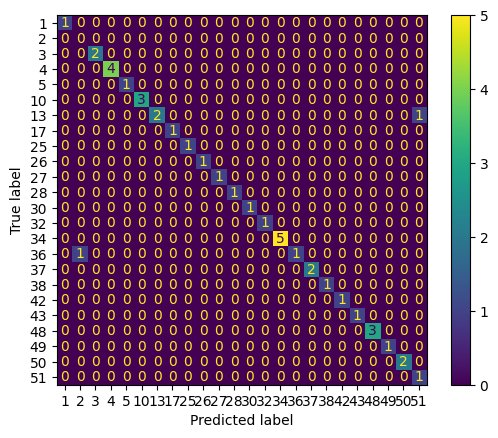

In [59]:
# plot the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_val[:40], y_pred_val[:40])
plt.show()

In [26]:
print(train_df.STATE.unique())

['NY' 'OR' 'ID' 'UT' 'GA' 'SC' 'ND' 'CA' 'RI' 'WI' 'CO' 'NM' 'KY' 'AZ'
 'WV' 'TN' 'WY' 'MT' 'NC' 'MN' 'MS' 'MI' 'NV' 'AL' 'OK' 'SD' 'KS' 'PA'
 'ME' 'WA' 'FL' 'MO' 'AR' 'IN' 'OH' 'TX' 'AK' 'NE' 'LA' 'NJ' 'IA' 'IL'
 'VA' 'MA' 'MD' 'DC' 'HI' 'NH' 'CT' 'PR' 'VT' 'DE']


In [31]:
print(y_val)

[17  1 50 ...  4 50 48]


In [32]:
print(y_pred_val)

[17  1 50 ...  4 50 48]


In [45]:
print(y_pred_val.shape)

(142721,)


In [38]:
unique_class_labels = pdy[0].unique()
print(sorted(unique_class_labels))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]


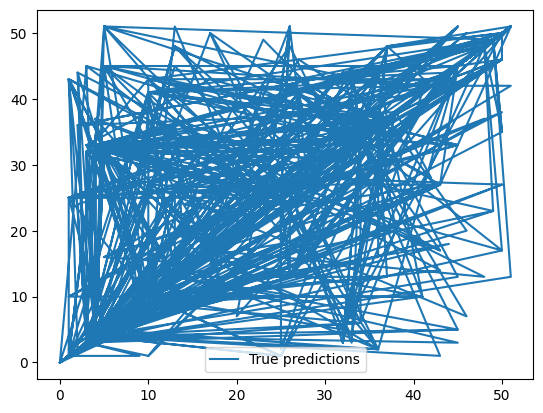

In [54]:
index = range(0,100)
plt.plot(y_pred_val[:10000], y_val[:10000], label = "True predictions")
#plt.plot(index, y_pred_val, label = "line 2")
plt.legend()
plt.show()

In [48]:
#df_interest["FIRE_YEAR"]
print(list(np.where(df_interest["FIRE_YEAR"] == 2012)))

[array([     0,      1,     36, ..., 713542, 713584, 713597], dtype=int64)]


In [49]:
row_indices = list(np.where(df_interest["FIRE_YEAR"] == 2012))
print(type(row_indices))

<class 'list'>
